In [1]:
import os
os.chdir('../')
import time
import argparse
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
from tensorboardX import SummaryWriter

import model_basic
import model_graph
import config
import evaluate
import data_utils

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [3]:
train_data = pd.read_csv('./data/final_synthetic3/total_df')
train_data = pd.read_csv('./data/final_synthetic3/total_df')
sid_pop_total = pd.read_csv('./data/final_synthetic3/sid_pop_total')

In [4]:
from pop_bias_metrics_basic import pred_item_rank, pred_item_score, pred_item_stdscore, pred_item_rankdist, pred_item_rankdist2, raw_pred_score

### 4.2. Illustration of the Proposed Method on the Synthetic Data

#### Baseline

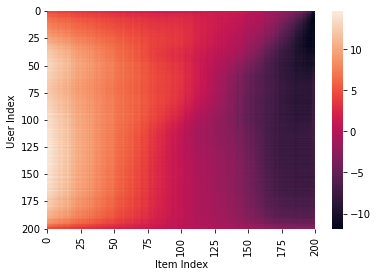

In [5]:
model = torch.load('./models/final_synthetic3__MF_none_1.0_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Recommendation Score - BPR loss')
plt.show()

Spearman Rank
0.9989795991073976
Quantile
0.01476898276053188


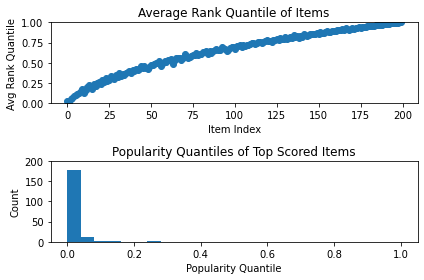

In [6]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())

### Pos2neg2

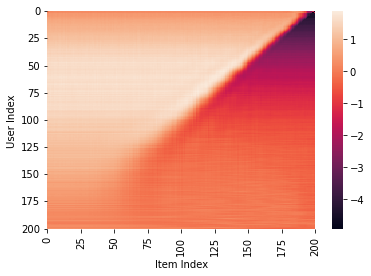

In [7]:
model = torch.load('./models/final_synthetic3__MF_pos2neg2_0.8_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Score - pos2neg2')
plt.show()

Spearman Rank
0.42668057701967194
Quantile
0.6244399570665241


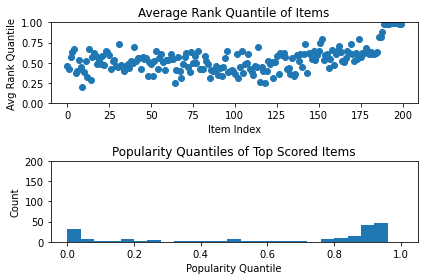

In [8]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())

### Zerosum

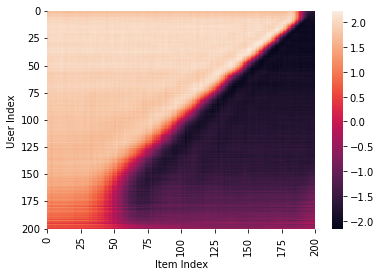

In [9]:
model = torch.load('./models/final_synthetic3__MF_posneg_0.8_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Score - zerosum')
plt.show()

Spearman Rank
0.5015984780614161
Quantile
0.6103441207619221


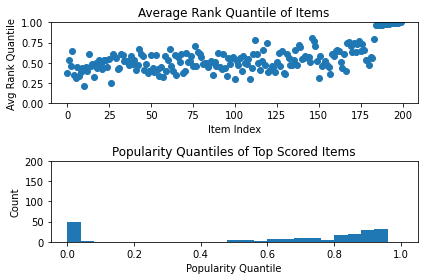

In [10]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())

### 4.3. Comparison with Earlier Methods

#### IPW

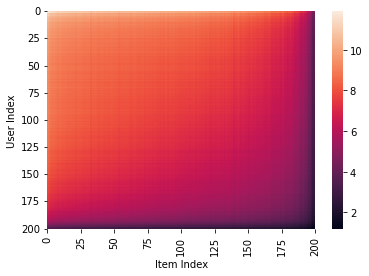

In [11]:
model = torch.load('./models/final_synthetic3__MF_ipw_1.0_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Score - ipw')
plt.show()

Spearman Rank
0.9957425169664381
Quantile
0.0


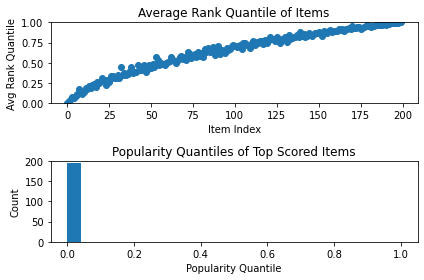

In [12]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())

#### PD

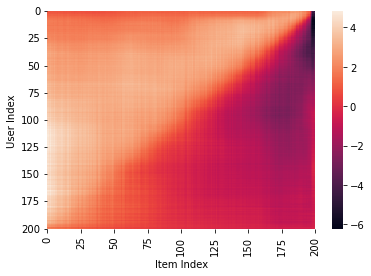

In [13]:
model = torch.load('./models/final_synthetic3__MF_pd_1.0_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Score - pd')
plt.show()

Spearman Rank
-0.3552652648561207
Quantile
0.2899931502988152


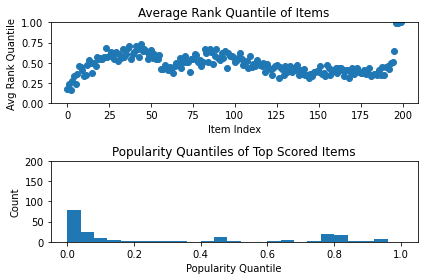

In [14]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())

#### Pearson

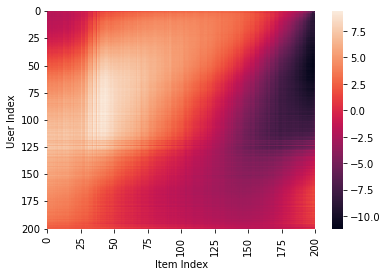

In [15]:
model = torch.load('./models/final_synthetic3__MF_pearson_5.0_10.pth')
model.eval()
model.cuda()
user_emb = model.embed_user_MLP.weight.detach().cpu()
item_emb = model.embed_item_MLP.weight.detach().cpu()
user_num = user_emb.shape[0]
item_num = item_emb.shape[0]
pred_mtx = np.zeros((user_num, item_num))

for user in range(user_num):
    pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
    pred_mtx[user,:] = pos_score.cpu().detach()
    
ax = plt.axes()
sns.heatmap(pred_mtx)
ax.set_xlabel('Item Index')
ax.set_ylabel('User Index')
ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])

#ax.set_title('Score - pearson')
plt.show()

Spearman Rank
0.789472282859233
Quantile
0.2573083686664788


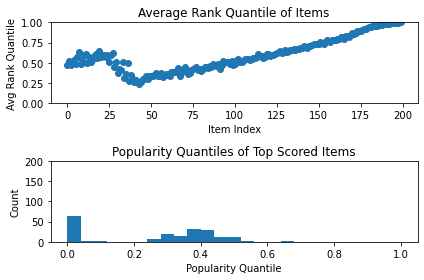

In [16]:
fig, axs = plt.subplots(2)
tmp = pred_item_rank(model, train_data, sid_pop_total)
axs[0].scatter(tmp.sid, tmp['rank'])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('Item Index')
axs[0].set_ylabel('Avg Rank Quantile')
axs[0].set_title('Average Rank Quantile of Items')
print('Spearman Rank')
print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

tmp = pred_item_rankdist(model, train_data, sid_pop_total)
axs[1].hist(tmp, bins = 25, range = (0,1))[2]
axs[1].set_ylim([0, 200])
axs[1].set_xlabel('Popularity Quantile')
axs[1].set_ylabel('Count')
axs[1].set_title('Popularity Quantiles of Top Scored Items')
plt.tight_layout()

print('Quantile')
print(tmp.mean())